<a href="https://colab.research.google.com/github/mavillan/gb-vpp/blob/main/models/gb-vpp-lstm-gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1
!pip install tensorflow-addons > /dev/null 2>&1
!pip install --upgrade pandas > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import os
from tensorflow.python.profiler import profiler_client
#tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
#print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

Found existing installation: tensorflow 2.4.3
Uninstalling tensorflow-2.4.3:
  Successfully uninstalled tensorflow-2.4.3
Tensorflow version 2.4.3
Running on TPU  ['10.126.202.194:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.126.202.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.126.202.194:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 78.2MB/s]
 97% 73.0M/75.4M [00:00<00:00, 113MB/s] 
100% 75.4M/75.4M [00:00<00:00, 153MB/s]
 93% 129M/139M [00:00<00:00, 116MB/s]
100% 139M/139M [00:01<00:00, 137MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [ ]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/results"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

In [ ]:
!kaggle datasets download --unzip --force -d mavillan/gb-vpp-folds-split

  0% 0.00/1.65M [00:00<?, ?B/s]
100% 1.65M/1.65M [00:00<00:00, 27.2MB/s]


In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            35G        1.2G         23G        1.2M         10G         33G
Swap:            0B          0B          0B


***

In [ ]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

In [ ]:
def reduce_mem_usage(df, verbose=False):
    """
    Utility function to reduce the memory usage of pandas dataframes
    
    Parameters
    ----------
    df: pandas.Dataframe
    verbose: Boolean
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

***
## data preparation

In [ ]:
class config:
    # data params
    SEQ_LEN = 80

    # train params
    EPOCHS = 300
    BATCH_SIZE = 512
    SCHEDULER_PATIENCE = 10
    SCHEDULER_FACTOR = 0.75
    STOPPING_PATIENCE = 35
    
    # others
    MODEL_ID = "lstm-gru"
    DEBUG = False
    
if config.DEBUG:
    config.EPOCHS = 2

In [ ]:
with open("./split_5folds.pkl", "rb") as file:
    split = pickle.load(file)

In [ ]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [ ]:
PRESSURE_VALUES = np.sort(train_raw.pressure.unique())

PRESSURE_MIN = train_raw.pressure.min()
PRESSURE_MAX = train_raw.pressure.max()
PRESSURE_STEP = PRESSURE_VALUES[1]-PRESSURE_VALUES[0]

def pressure_to_idx(array):
    return ((array - PRESSURE_MIN) / PRESSURE_STEP).astype(int)

def idx_to_pressure(array):
    return (array * PRESSURE_STEP) + PRESSURE_MIN

In [ ]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if config.SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )

In [ ]:
def add_features(df):
    df['cross']= df['u_in'] * df['u_out']
    df['cross2']= df['time_step'] * df['u_out']
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    print("Step-1...Completed")
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    print("Step-2...Completed")
    
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_out__max'] = df.groupby(['breath_id'])['u_out'].transform('max')
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    print("Step-3...Completed")
    
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    print("Step-4...Completed")
    
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    print("Step-5...Completed")
    
    df['time_step_diff'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"
                                                                    #"15_in_std":"std"
                                                               })\
                                                               .reset_index(level=0,drop=True))
    print("Step-6...Completed")
    
    #df['u_in_diff_1_2'] = df['u_in_lag1'] - df['u_in_lag2']
    #df['u_out_diff_1_2'] = df['u_out_lag1'] - df['u_out_lag2']
    #df['u_in_lagback_diff_1_2'] = df['u_in_lag_back1'] - df['u_in_lag_back2']
    #df['u_out_lagback_diff_1_2'] = df['u_out_lag_back1'] - df['u_out_lag_back2']
    
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    print("Step-7...Completed")
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    print("Step-8...Completed")
    
    return df

print("Train data...\n")
train = add_features(train_raw)
train = reduce_mem_usage(train, verbose=True)
print("\nTest data...\n")
test = add_features(test_raw)
test = reduce_mem_usage(test, verbose=True)

del train_raw,test_raw
gc.collect()

Train data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed
Mem. usage decreased to 1318.21 Mb (52.2% reduction)

Test data...

Step-1...Completed
Step-2...Completed
Step-3...Completed
Step-4...Completed
Step-5...Completed
Step-6...Completed
Step-7...Completed
Step-8...Completed
Mem. usage decreased to 863.46 Mb (52.2% reduction)


0

In [ ]:
# def compute_feats(df):
    
#     df['area'] = df['time_step'] * df['u_in']
#     df['area'] = df.groupby('breath_id')['area'].cumsum()

#     df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
#     df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
#     df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
#     df["time_diff"] = df["time_diff"].fillna(method="bfill")
    
#     df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
#     df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)
    
#     df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
#     df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
#     df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
#     df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    
#     df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
#     df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
#     df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
#     df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)

#     df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
#     df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
#     df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
#     df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    
#     df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
#     df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
#     df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
#     df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
#     df = df.fillna(0)
    
#     df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
#     df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
#     df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
#     df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']

#     df['cross']= df['u_in']*df['u_out']
#     df['cross2']= df['time_step']*df['u_out']
    
#     df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
#     df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
#     df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']

#     df['ewm_u_in_mean'] = (
#         df
#         .groupby('breath_id')['u_in']
#         .ewm(halflife=9)
#         .mean()
#         .reset_index(level=0,drop=True)
#     )
#     df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (
#         df
#         .groupby('breath_id')['u_in']
#         .rolling(window=15,min_periods=1)
#         .agg({"15_in_sum":"sum",
#             "15_in_min":"min",
#             "15_in_max":"max",
#             "15_in_mean":"mean"})
#         .reset_index(level=0,drop=True)
#     )

#     df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
#     df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
#     df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
#     df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']

#     # ohe of R&C values
#     df['R_cont'] = df['R'].copy()
#     df['C_cont'] = df['C'].copy()

#     df['R'] = df['R'].astype(str)
#     df['C'] = df['C'].astype(str)
#     df['RC'] = df['R']+df['C']
#     df = pd.get_dummies(df)

#     # time features
#     df.drop("time_step", axis=1, inplace=True)

#     return df

# train = compute_feats(train_raw)
# test = compute_feats(test_raw)

# train.info()

In [ ]:
#def compute_feats(df):
#     df = df.copy()

#     # time features
#     df["time_diff"] = df.groupby("breath_id")["time_step"].diff()
#     df['time_since_expiratory']= df['time_step']*df['u_out']

#     # lag features
#     lags = [1,2,3,4,5]
#     for lag in lags:
#         df[f"u_in_lag{lag}p"] = df.groupby("breath_id")["u_in"].shift(lag).fillna(0)
#         df[f"u_in_lag{lag}m"] = df.groupby("breath_id")["u_in"].shift(-lag).fillna(0)

#     # diff features
#     df['u_in_diff1'] = df.eval('u_in - u_in_lag1p')
#     df['u_in_diff2'] = df.eval('u_in - u_in_lag2p')
#     df['u_in_diff3'] = df.eval('u_in - u_in_lag3p')
#     df['u_in_diff4'] = df.eval('u_in - u_in_lag4p')
#     df['u_in_diff5'] = df.eval('u_in - u_in_lag5p')

#     # stats on u_in
#     df["u_in_cumsum"] = df.groupby("breath_id")["u_in"].cumsum()
#     df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)

#     df['u_in_first'] = df.groupby('breath_id')['u_in'].transform('first')
#     df['u_in_last'] = df.groupby('breath_id')['u_in'].transform('last')

#     df['u_in_1st_half'] = df['u_in'] * (1 - df['u_out'])
#     df['u_in_2nd_half'] = df['u_in'] * df['u_out']

#     df['u_in_max'] = df.groupby(['breath_id'])['u_in'].transform('max')        
#     df['u_in_diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    
#     df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
#     df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()

#     # gradients of u_in
#     def compute_grad_1st(df):
#         return np.gradient(df.u_in, 100*df.time_step)
#     def compute_grad_2nd(df):
#         return np.gradient(df.ugrad_d1, 100*df.time_step)

#     gb_result = df.groupby("breath_id").apply(compute_grad_1st)
#     df["ugrad_d1"] = np.concatenate(gb_result.values)
#     gb_result = df.groupby("breath_id").apply(compute_grad_2nd)
#     df["ugrad_d2"] = np.concatenate(gb_result.values)

#     # lags on gradients
#     for lag in lags:
#         df[f"ugrad_d1_lag{lag}p"] = df.groupby("breath_id")["ugrad_d1"].shift(lag).fillna(0)
#         df[f"ugrad_d2_lag{lag}p"] = df.groupby("breath_id")["ugrad_d2"].shift(lag).fillna(0)

#     # nan filling
#     df["time_diff"] = df["time_diff"].fillna(method="bfill")

#     # Features on R&C values
#     df['R/C'] = df.eval("R/C")
#     df['C/R'] = df.eval("C/R")
    
#     # ohe of R&C values    
#     df['R_categ'] = df['R'].astype(str)
#     df['C_categ'] = df['C'].astype(str)
#     df = pd.get_dummies(df)

#     # delete features
#     df.drop("time_step", axis=1, inplace=True)

#     return df

# train = compute_feats(train_raw)
# test  = compute_feats(test_raw)

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, config.SEQ_LEN)
oof = train[["id","breath_id","u_out","pressure"]].copy()
test_raw = test[["id"]].copy()

cols_to_exclude_train = [
    'pressure','id', 'breath_id','one','count', 
    'breath_id_lag','breath_id_lag2','breath_id_lagsame',
    'breath_id_lag2same'
]
cols_to_exclude_test = [
    'id', 'breath_id','one','count','breath_id_lag',
    'breath_id_lag2','breath_id_lagsame','breath_id_lag2same'
]

train.drop(cols_to_exclude_train, axis=1, inplace=True)
test.drop(cols_to_exclude_test, axis=1, inplace=True)

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = train.reshape(-1, config.SEQ_LEN, train.shape[1])
test =  test.reshape(-1, config.SEQ_LEN, train.shape[2])

***
## model training

In [ ]:
def build_model(input_dim):
    with tpu_strategy.scope():   
        inputs = layers.Input(shape = input_dim)
            
        x1 = layers.Bidirectional(layers.LSTM(units=768, return_sequences=True))(inputs)
        x2 = layers.Bidirectional(layers.LSTM(units=512, return_sequences=True))(x1)
        x3 = layers.Bidirectional(layers.LSTM(units=256, return_sequences=True))(x2)
        x4 = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True))(x3)
        
        z2 = layers.Bidirectional(layers.GRU(units=256, return_sequences=True))(x2)
        z3 = layers.Bidirectional(layers.GRU(units=128, return_sequences=True))(layers.Add()([x3, z2]))
        z4 = layers.Bidirectional(layers.GRU(units=64, return_sequences=True))(layers.Add()([x4, z3]))
        
        x = layers.Concatenate(axis=2)([x4, z2, z3, z4])
        x = layers.Dense(units=128, activation='selu')(x)
        output = layers.Dense(units=1)(x)

        model = keras.Model(inputs=inputs, outputs=output, name=config.MODEL_ID)
        model.compile(optimizer="adam", loss="mae")
    
    return model  

----------------------------------- Fold: 1 ------------------------------------
Model: "lstm-gru"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 64)]     0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 80, 1536)     5117952     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 80, 1024)     8392704     bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 80, 512)      2623488     bidirectional_1[0][0]            
__________

None

Epoch 1/300
118/118 [==============================] - 89s 450ms/step - loss: 3.2865 - val_loss: 0.7791
Epoch 2/300
118/118 [==============================] - 20s 171ms/step - loss: 0.7042 - val_loss: 0.5074
Epoch 3/300
118/118 [==============================] - 20s 171ms/step - loss: 0.5359 - val_loss: 0.4657
Epoch 4/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4802 - val_loss: 0.4192
Epoch 5/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4386 - val_loss: 0.4185
Epoch 6/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4126 - val_loss: 0.4485
Epoch 7/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3970 - val_loss: 0.3960
Epoch 8/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3753 - val_loss: 0.3601
Epoch 9/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3647 - val_loss: 0.3667
Epoch 10/300
118/118 [==============================] - 20s 171m

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold0/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold0/assets


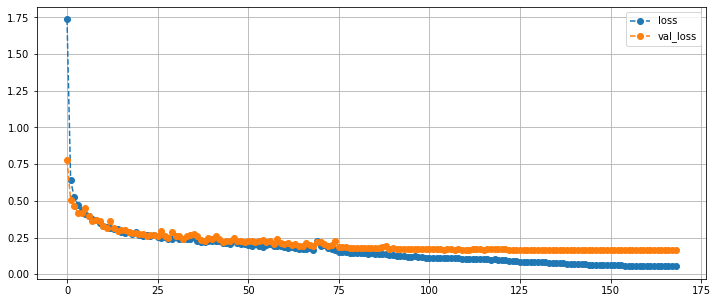

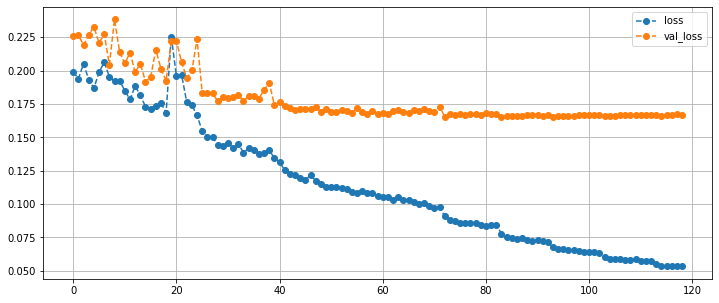

----------------------------------- Fold: 2 ------------------------------------
Model: "lstm-gru"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 80, 64)]     0                                            
__________________________________________________________________________________________________
bidirectional_7 (Bidirectional) (None, 80, 1536)     5117952     input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 80, 1024)     8392704     bidirectional_7[0][0]            
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 80, 512)      2623488     bidirectional_8[0][0]            
__________

None

Epoch 1/300
118/118 [==============================] - 89s 450ms/step - loss: 3.0617 - val_loss: 0.7133
Epoch 2/300
118/118 [==============================] - 20s 171ms/step - loss: 0.7219 - val_loss: 0.5810
Epoch 3/300
118/118 [==============================] - 20s 171ms/step - loss: 0.5501 - val_loss: 0.4786
Epoch 4/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4802 - val_loss: 0.4591
Epoch 5/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4499 - val_loss: 0.4231
Epoch 6/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4266 - val_loss: 0.4069
Epoch 7/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3938 - val_loss: 0.3892
Epoch 8/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3793 - val_loss: 0.3640
Epoch 9/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3562 - val_loss: 0.3586
Epoch 10/300
118/118 [==============================] - 20s 172m

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold1/assets


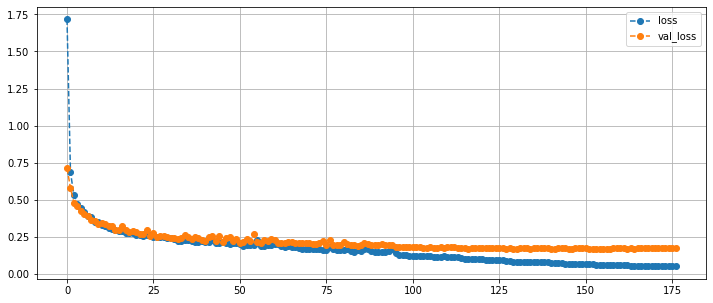

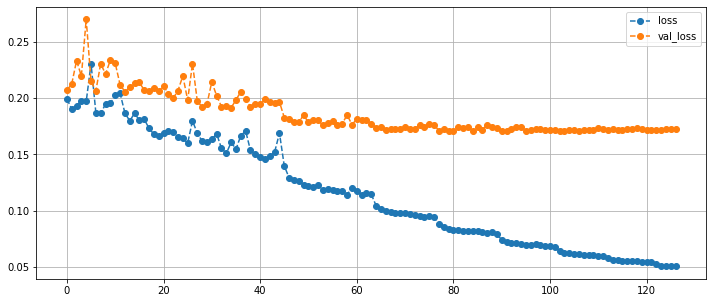

----------------------------------- Fold: 3 ------------------------------------
Model: "lstm-gru"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 80, 64)]     0                                            
__________________________________________________________________________________________________
bidirectional_14 (Bidirectional (None, 80, 1536)     5117952     input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_15 (Bidirectional (None, 80, 1024)     8392704     bidirectional_14[0][0]           
__________________________________________________________________________________________________
bidirectional_16 (Bidirectional (None, 80, 512)      2623488     bidirectional_15[0][0]           
__________

None

Epoch 1/300
118/118 [==============================] - 90s 449ms/step - loss: 3.2291 - val_loss: 0.6936
Epoch 2/300
118/118 [==============================] - 20s 171ms/step - loss: 0.6972 - val_loss: 0.6202
Epoch 3/300
118/118 [==============================] - 20s 172ms/step - loss: 0.5289 - val_loss: 0.4705
Epoch 4/300
118/118 [==============================] - 20s 171ms/step - loss: 0.4807 - val_loss: 0.4633
Epoch 5/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4344 - val_loss: 0.4173
Epoch 6/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4108 - val_loss: 0.3856
Epoch 7/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3878 - val_loss: 0.4001
Epoch 8/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3755 - val_loss: 0.3729
Epoch 9/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3606 - val_loss: 0.3550
Epoch 10/300
118/118 [==============================] - 20s 172m

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold2/assets


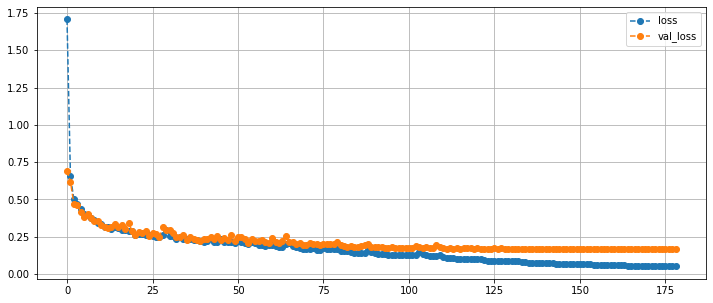

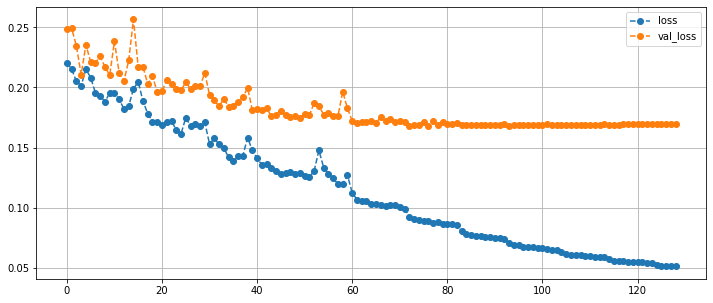

----------------------------------- Fold: 4 ------------------------------------
Model: "lstm-gru"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 80, 64)]     0                                            
__________________________________________________________________________________________________
bidirectional_21 (Bidirectional (None, 80, 1536)     5117952     input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_22 (Bidirectional (None, 80, 1024)     8392704     bidirectional_21[0][0]           
__________________________________________________________________________________________________
bidirectional_23 (Bidirectional (None, 80, 512)      2623488     bidirectional_22[0][0]           
__________

None

Epoch 1/300
118/118 [==============================] - 89s 452ms/step - loss: 3.0510 - val_loss: 0.7347
Epoch 2/300
118/118 [==============================] - 23s 199ms/step - loss: 0.6988 - val_loss: 0.6055
Epoch 3/300
118/118 [==============================] - 20s 171ms/step - loss: 0.5202 - val_loss: 0.4770
Epoch 4/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4767 - val_loss: 0.4407
Epoch 5/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4349 - val_loss: 0.3988
Epoch 6/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4107 - val_loss: 0.4470
Epoch 7/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4065 - val_loss: 0.3937
Epoch 8/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3794 - val_loss: 0.3813
Epoch 9/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3660 - val_loss: 0.3582
Epoch 10/300
118/118 [==============================] - 20s 172m

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold3/assets


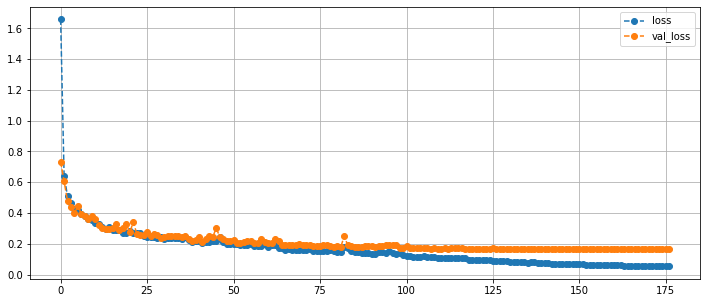

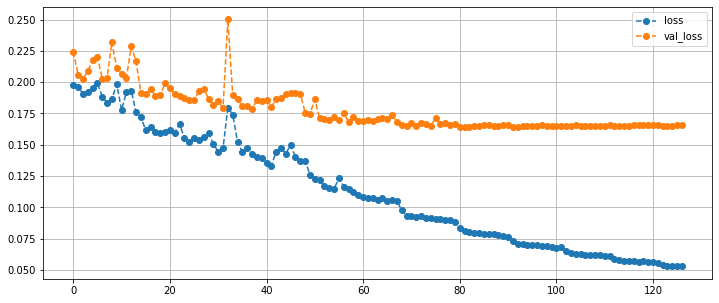

----------------------------------- Fold: 5 ------------------------------------
Model: "lstm-gru"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 80, 64)]     0                                            
__________________________________________________________________________________________________
bidirectional_28 (Bidirectional (None, 80, 1536)     5117952     input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_29 (Bidirectional (None, 80, 1024)     8392704     bidirectional_28[0][0]           
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (None, 80, 512)      2623488     bidirectional_29[0][0]           
__________

None

Epoch 1/300
118/118 [==============================] - 90s 451ms/step - loss: 2.9785 - val_loss: 0.7401
Epoch 2/300
118/118 [==============================] - 20s 171ms/step - loss: 0.7001 - val_loss: 0.5398
Epoch 3/300
118/118 [==============================] - 20s 171ms/step - loss: 0.5297 - val_loss: 0.5473
Epoch 4/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4901 - val_loss: 0.4781
Epoch 5/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4602 - val_loss: 0.4010
Epoch 6/300
118/118 [==============================] - 20s 172ms/step - loss: 0.4107 - val_loss: 0.4102
Epoch 7/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3931 - val_loss: 0.3984
Epoch 8/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3822 - val_loss: 0.3637
Epoch 9/300
118/118 [==============================] - 20s 172ms/step - loss: 0.3520 - val_loss: 0.3412
Epoch 10/300
118/118 [==============================] - 20s 172m

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold4/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru_fold4/assets


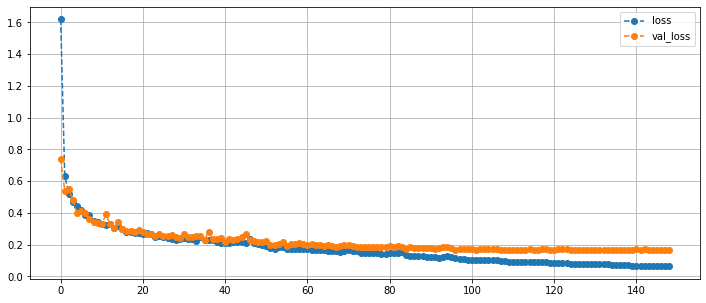

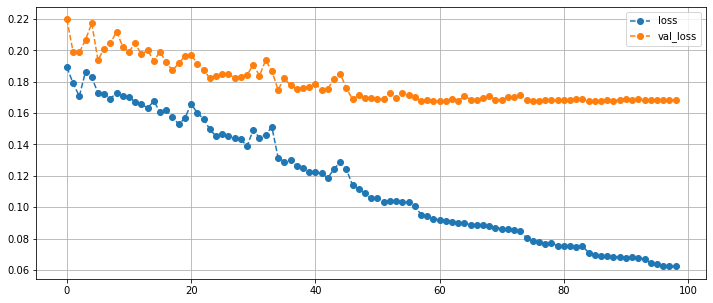

In [ ]:
models_by_fold = list()

for fold in range(5):
    print(f" Fold: {fold+1} ".center(80, "-"))
    
    train_idx = split[f"fold-{fold}"]["train"]
    valid_idx = split[f"fold-{fold}"]["valid"]

    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    #scheduler = ExponentialDecay(
    #    initial_learning_rate=1e-3, 
    #    decay_steps=EPOCH*((len(train)*0.8)/BATCH_SIZE), 
    #    decay_rate=1e-5
    #)
    #lr = LearningRateScheduler(scheduler, verbose=1)
    #lr = OneCycleScheduler(
    #    lr_max = 1e-3,
    #    steps = EPOCH*(X_train.shape[0]/BATCH_SIZE),
    #    phase_1_pct = 0.2,
    #    init_div_factor = 1e1,
    #    final_div_factor = 1e2,
    #)

    #steps_per_epoch = (len(X_train) // BATCH_SIZE) + 1
    #clr = tfa.optimizers.CyclicalLearningRate(
    #    initial_learning_rate = INIT_LR,
    #    maximal_learning_rate = MAX_LR,
    #    scale_fn = lambda x: (0.8)**(x-1),
    #    step_size = 10*steps_per_epoch
    #)

    lr = ReduceLROnPlateau(
        monitor="val_loss", 
        factor=config.SCHEDULER_FACTOR, 
        patience=config.SCHEDULER_PATIENCE, 
        verbose=1
    )
    es = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        patience=config.STOPPING_PATIENCE, 
        verbose=1,
        restore_best_weights=True,
    )

    model = build_model(
        input_dim=train.shape[-2:],
    )
    display(model.summary())

    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_valid, y_valid), 
        epochs=config.EPOCHS, 
        batch_size=config.BATCH_SIZE, 
        callbacks=[lr,es],
        shuffle=True,
        verbose=1,
    )
    models_by_fold.append(model)

    save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    model.save(f"{artifacts_path}/{config.MODEL_ID}_fold{fold}", options=save_locally)

    # generate the oof predictions
    x_valid_tf = tf.convert_to_tensor(X_valid, dtype=tf.float32)
    oof_preds = model.call(x_valid_tf, training=False).numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()

    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"], "o--", label="loss")
    plt.plot(history.history["val_loss"], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"][50:], "o--", label="loss")
    plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()


In [ ]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 0.16353574395179749
mae inspiratory: 0.16986723244190216
mae expiratory : 0.16034477949142456


***
## sub generation

In [ ]:
all_preds = list()
test_tf = tf.convert_to_tensor(test, dtype=tf.float32)

for model in models_by_fold:
    preds = model.call(test_tf, training=False).numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.median(all_preds, axis=0)

In [ ]:
# saves final sub
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}.csv", index=False)

sub["pressure"] =\
    np.round( (sub.pressure - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
sub.pressure = np.clip(sub.pressure, PRESSURE_MIN, PRESSURE_MAX)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}_clip.csv", index=False)

In [ ]:
# saves oof preds
oof.to_csv(f"{results_path}/oof_{config.MODEL_ID}.csv", index=False)

In [ ]:
# saves each model preds (pseudo labels)
for fold,preds in enumerate(all_preds):
    _sub = submission.copy()
    _test = test_raw[["id","pressure"]].copy()
    _test["pressure"] = preds
    _sub = pd.merge(_sub["id"], _test[["id","pressure"]], how="left", on="id")
    _sub["pressure"] = _sub["pressure"].fillna(0)
    _sub.to_csv(f"{results_path}/plabels_{config.MODEL_ID}_{fold}.csv", index=False)

***